<a href="https://colab.research.google.com/github/NeznaikanaLune/MISIS_DS_Masters_degree_2020/blob/master/smriz_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Проблема**

Задача построения оптимальных планов.

При этом заданы:
- план производства продукции, перевыполнять который нежелательно;
- производительность работ для каждого варианта технологии;
- технологическая схема расположения АГР;
- фонд свободного времени для каждого АГР.

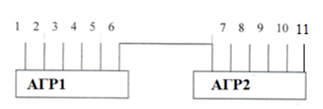

Рисунок 1 -функциональная схема производства

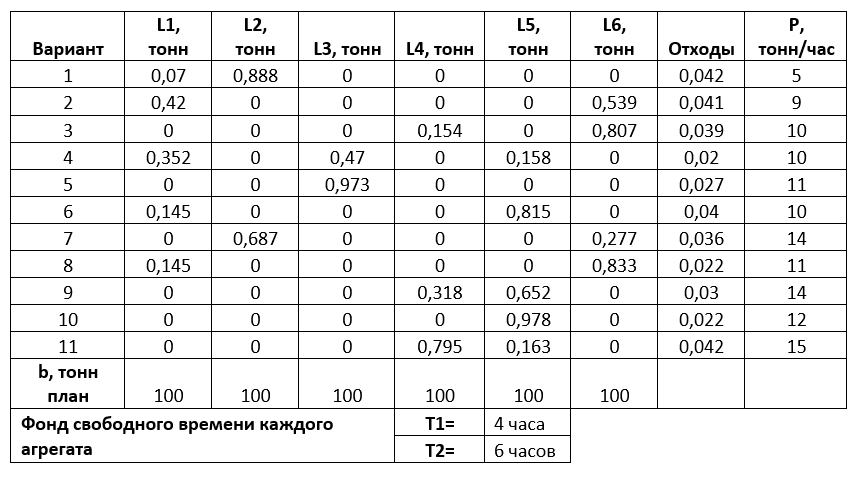

# **2.Содержательная постановка задачи**

Сколько тонн исходного ресурса переработать по каждой из технологий с тем, чтобы выполнить или перевыполнить план и уложиться в фонд свободного времени агрегатов.

Дополнительные сведения:
1.	Ресурс достаточно дорогой и поступает из вне;
2.	Перепроизводство продуктов нежелательно, за исключением продуктов, пользующихся на рынке повышенным спросом;
3.	Возможны сверхурочные операции, но за дополнительную плату;
4.	Фонда рабочего времени может не хватить для выполнения плана.


 # **3. Формальная математическая модель**
Из исходного ресурса по 11 технологиям производится 6 видов продуктов.

$X_1,X_2,\ldots,X_{11}$-количество тонн ресурса к переработке

$b=\left[100,100,100,100,100,100\right]$-план производства продуктов

$a_{[i,j]}=\left[\begin{matrix}\begin{matrix}0,070\\0,42\\0\\\end{matrix}&\begin{matrix}0,888\ \\0\\0\\\end{matrix}\\\begin{matrix}0,352\\0\\\begin{matrix}0,145\\0\\\begin{matrix}0,145\\0\\\begin{matrix}0\\0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}&\begin{matrix}0\\0\\\begin{matrix}0\\0,687\\\begin{matrix}0\\0\\\begin{matrix}0\\0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\ \ \ \ \begin{matrix}\begin{matrix}0\\0\\0\\\end{matrix}&\begin{matrix}0\\0\\0,154\\\end{matrix}\\\begin{matrix}0,47\\0,973\ \\\begin{matrix}0\\0\\\begin{matrix}0\\0\\\begin{matrix}0\\0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}&\begin{matrix}0\\0\\\begin{matrix}0\\0\\\begin{matrix}0\\0,318\ \\\begin{matrix}0\\0,795\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\ \ \ \ \begin{matrix}\begin{matrix}0\\0\\0\\\end{matrix}&\begin{matrix}0\\0,539\ \\0,807\ \\\end{matrix}\\\begin{matrix}0,158\ \\0\\\begin{matrix}0,815\\0\\\begin{matrix}0\\0,652\\\begin{matrix}0,978\ \\0,163\ \\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}&\begin{matrix}0\\0\\\begin{matrix}0\\0,277\\\begin{matrix}0,833\ \\0\\\begin{matrix}0\\0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\ \ \ \ \right]$ - получим тонн jго продукта из 1 тонны iго ресурса

$P=\left[5,9,10,10,11,10,14,11,14,12,15\right]$-производительность переработки ресурса (тонн\час)

$\varepsilon=\left[0.042,0.041,0.039,0.02,0.027,0.04,0.036,0.022,0.03,0.022,0.042\right]$-отходы при переработке ресурсов. Чем меньше отходов, тем меньше производительность и более трудоемкая технология.

$Т_1=4\ часа, Т_2=6\ часов$ – фонд рабочего времени агрегатов 

Тогда математическую модель можно записать в следующем виде:

$\begin{equation*}
\left\{
  \begin{array}{lr}
  X_{i} \geq 0, i\in Z, i\in [1,11] - естественное\ ограничение,\ количество\ тонн\ неотрицательное\\
  \sum_{i=1}^{11}\sum_{j=1}^{6} X_{i}*a_{ij} \geq b_j - ограничение\ по\ плану \\
  \sum_{i=1}^{6} \frac{X_i}{P_i} \leq T_1 - ограничение\ по\ фонду\ рабочего\ времени \\ 
  \sum_{i=6}^{11} \frac{X_i}{P_i} \leq T_2 - ограничение\ по\ фонду\ рабочего\ времени \\ 
  \sum_{i=1}^{11} X_{i} \rightarrow min\ (\sum_{i=1}^{11} X_{i}*e_i \rightarrow min) - целевая\ функция\ для\ оптимизации\\
  \end{array}
\right.
\end{equation*}$


*Можно использовать как целевую функцию, суммарный ресурс к переработке, так и отходы. Если удается выполнить план без перевыполнения (а в моем варианте удастся), в этом случае оба критерия дают один и тот же результат. Они равнозначны. Чем больше ресурса перерабатываем, тем больше отходов получаем.  Если не удается выполнить план без перевыполнения, тогда предпочтительным является критерий минимизации ресурса для производства.*

Переход к классической постановке задаче линейного программирования:

$min(F(x))=-max(-F(x))$


В данной модели используем метод главного критерия - сведение задачи многокритериальной оптимизации к однокритериальной оптимизации. Для этого выбираем один из рассматриваемых критериев в качестве главного критерия, а остальные преобразовываются в ограничения. Так целевой функцией также является время сверхурочной работы агрегатов. Но тк сказано, что работаем с дорогим ресурсом, то ограничение по плану имеет большую важность. Поэтому целевая функция для оптимизации времени заменяется на ограничение в соответствии с выбранным методом.

# **4.	Алгоритм и ПО**

•	Линейное программирование, метод главного критерия, квази-лексикографическая оптимизация;

•	Google Collab (Python)– среда разработки; 

•	Numpy - open-source модуль для python, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций;

•	matplotlib - модуль визуализации для python

•	cvxpy-python модуль для решения задач выпуклой оптимизации;

•	Excel – для анализа и визуализации полученных результатов.


Данное ПО выбрано в виду того, что Python активно используется автором работы (это означает простоту реализации, тк будет использоваться уже знакомый инструмент), также Python имеет большое количество библиотек, приспособленных под проведение математических вычислений.


# **5.	Решение задачи**

In [ ]:
import numpy as np
import cvxpy

a = np.array([[0.07, 0.888, 0, 0, 0, 0],
              [0.42, 0, 0, 0, 0,0.539],
              [0, 0, 0, 0.154, 0, 0.807],
              [0.352, 0, 0.470, 0, 0.158, 0],
              [0, 0, 0.973, 0, 0, 0],
              [0.145, 0, 0, 0, 0.815, 0],
              [0, 0.687, 0, 0, 0, 0.277],
              [0.145, 0, 0, 0, 0, 0.833],
              [0, 0, 0, 0.318, 0.652, 0],
              [0, 0, 0, 0, 0.978, 0],
              [0, 0, 0, 0.795, 0.163, 0]]) #получим тонн продукции из 1 тонны ресурса
b = np.array([[100, 100, 100, 100, 100, 100]]) #план
P = np.array([[5, 9, 10, 10, 11,10, 14, 11, 14, 12, 15]]) #производительность
e = np.array([[0.042, 0.041, 0.039, 0.02, 0.027, 0.04, 0.036, 0.022, 0.03, 0.022, 0.042]]) # отходы

x = cvxpy.Variable(shape=(1,a .shape[0]), integer = False)#тонн ресурса к переработке по каждой из технологий
total =  cvxpy.sum(x,axis=1) #целевая функция
C0 = x>=0
C1 = x*a>=b
C2 = cvxpy.sum([x[0,i]/P[0,i] for i in range(0,6)])<=4
C3 = cvxpy.sum([x[0,i]/P[0,i] for i in range(6,11)])<=6

#Тк cvxpy может искать и min, и max, то решаем задачу в исходной постановке, без перехода к классической форме
problem = cvxpy.Problem(cvxpy.Minimize(total), constraints=[C0,C1,C2,C3])
if problem.solve()== np.inf:
  print('Нет решения')
else:
  print(np.round(x.value,4))

Нет решения


# **6.	Анализ полученных результатов**

В заданных условиях задача не имеет решения. 
В дополнительных сведениях указано, что ресурс достаточно дорогой. Примем, что закупка дополнительного ресурса, чем увеличение рабочего време-ни агрегатов.
Нужно:
- увеличить время работы агрегатов (назначить сверхурочные часы);
- уменьшить план (при этом не забывать о комплектности).

Уменьшать план – сложно. Это некая потребность, которая носит ком-плектный характер. Не понятно без дополнительных уточнений, что именно означает уменьшать план и возможно ли в целом это осуществить. Можно уменьшить его пропорционально по всем видам продукта или только по опреде-ленным продуктам. Нужны дополнительные предположения.

Поэтому оценим возможность выполнения плана с учетом сверхурочной работы агрегатов.



# **7. Содержательная постановка задачи (переформулировка)**
Сколько тонн исходного ресурса переработать по каждой из технологий с тем, чтобы выполнить или перевыполнить план *с минимально возможным количеством сверхурочных часов работы агрегатов*.

# **8.Формальная математическая модель (переформулированная постановка задачи)**

$X_1,X_2,\ldots,X_{11}$-количество тонн ресурса к переработке\
$b, a, P,\ \varepsilon,T_1,T_2$ – описаны в разделе 2 данной работы.\
Тогда математическую модель можно записать в следующем виде:

$\begin{equation*}
\left\{
  \begin{array}{lr}
  X_{i} \geq 0, i\in Z, i\in [1,11] - естественное\ ограничение,\ количество\ тонн\ неотрицательное\\
  \sum_{i=1}^{11}\sum_{j=1}^{6} X_{i}*a_{ij} \geq b_j - ограничение\ по\ плану \\
  \sum_{i=1}^{11} X_{i} \rightarrow min\ (\sum_{i=1}^{11} X_{i}*e_i \rightarrow min)- целевая\ функция\ для\ оптимизации\\
  \end{array}
\right.
\end{equation*}$

Можно к классической постановке задаче линейного программирования:

$min(F(x))=-max(-F(x))$

Решением данной системы будет: $X^\ast=\ [X_1^\ast,X_2^\ast...X_{11}^\ast]$\
Если технология обладает какими-то отходами, то как правило, чем меньше отходы, тем эта технология более трудоемкая (больше временных) и тем меньше производительность по этой технологии.

Тогда возможно посчитать разницу между полученными значениями по времени работы агрегатов и заданными:$\sum_{i=1}^{6}\frac{Xi}{Pi}-T1=∆T1>0,\sum_{i=1}^{6}\frac{Xi}{Pi}-T2=∆T2>0.$\
Откуда имеем 2 критерия для оптимизации: $F_1=\ \sum_{i=1}^{11}{X_i\rightarrow m i n},{\ F}_2\ =\ ∆T1+∆T2→min$\
Воспользуемся схемой квази-лексикографической оптимизации (в случае, когда для любого $j \sum{a_{ij}\ast X_i^{*}}=b_j,j=\overline{1,6})$:

1. Предположение о том, что один из критериев более важный. В данном случае – это выполнения плана $F_1=\ \sum_{i=1}^{11}{X_i\rightarrow m i n}$. По этому критерию уже выполнен расчет ранее.

2. Минимизируем следующий менее главный критерий ${\ F}_2\ =\ ∆T1+∆T2→min$. Чтобы это было сделать возможно, назначаем по главному критерию $F_1$ уступку - $∆F$.

В случае квази-лексикографической оптимизации математическая модель примет вид:

$\begin{equation*}
\left\{
  \begin{array}{lr}
  X_{i} \geq 0, i\in Z, i\in [1,11] - естественное\ ограничение,\ количество\ тонн\ неотрицательное\\
  \sum_{i=1}^{11}\sum_{j=1}^{6} X_{i}*a_{ij} \geq b_j - ограничение\ по\ плану \\
  \sum_{i=1}^{11} X_{i} \leq F_1(X^{*})+∆F - ограничение\ по\ уступке\ \\ 
  \sum_{i=1}^{6} \frac{X_i}{P_i}+\sum_{i=6}^{11} \frac{X_i}{P_i} \rightarrow min - целевая\ функция\ для\ оптимизации\ без\ констант\ T_1, T_2 \\
  \end{array}
\right.
\end{equation*}$

Можно к классической постановке задаче линейного программирования:

$min(F(x))=-max(-F(x))$

Величину уступки будем подбирать простым пребером значений и выбором такого, которое обеспечивает наименьшее значение целевой функции. 






# **9.	Решение задачи (переформулированная постановка задачи)**

#### **Шаг 1.1 расчет возможности выполнения плана без ограничения по фонду рабочего времени агрегатов, целевая функция-минимизация ресурса к переработке**

In [ ]:
# Посчитаем возможность выполнения плана без огранчения по фонду рабочего времения агрегатов (те не важно за какое время выполнится план, нас интересует можно его реализовать или нет), целевая функция-минимизация ресурса к переработке
import numpy as np
import cvxpy

a = np.array([[0.07, 0.888, 0, 0, 0, 0],
              [0.42, 0, 0, 0, 0,0.539],
              [0, 0, 0, 0.154, 0, 0.807],
              [0.352, 0, 0.470, 0, 0.158, 0],
              [0, 0, 0.973, 0, 0, 0],
              [0.145, 0, 0, 0, 0.815, 0],
              [0, 0.687, 0, 0, 0, 0.277],
              [0.145, 0, 0, 0, 0, 0.833],
              [0, 0, 0, 0.318, 0.652, 0],
              [0, 0, 0, 0, 0.978, 0],
              [0, 0, 0, 0.795, 0.163, 0]])
b = np.array([[100, 100, 100, 100, 100, 100]])
P = np.array([[5, 9, 10, 10, 11,10, 14, 11, 14, 12, 15]]) #производительность работ
e = np.array([[0.042, 0.041, 0.039, 0.02, 0.027, 0.04, 0.036, 0.022, 0.03, 0.022, 0.042]]) # отходы при производстве продукции

x = cvxpy.Variable(shape=(1,a .shape[0]), integer = False)
total =  cvxpy.sum(x,axis=1)#целевая функция
C0 = x>=0
C1 = x*a>=b

problem = cvxpy.Problem(cvxpy.Minimize(total), constraints=[C0,C1])
if problem.solve()== np.inf:
  print('Нет решения')
else:
  print('Cколько реcурса по каждой технологии переработать, чтобы план был выполнен или перевыполнен:',np.round(x.value,4))
  print('Суммарное количество реcурса к переработаке:',np.round(np.sum(x.value),4))
print('План, расчетный:',np.round(x.value@a,4))#расчет плана
x_new = np.sum(x.value)

delta_t1 = sum([x.value[0,i]/P[0,i] for i in range(0,6)]) #T1 расчет
delta_t2 = sum([x.value[0,i]/P[0,i] for i in range(6,11)]) #T2 расчет
print('Полученное суммарное время работы агрегатов {} часов'.format(round(delta_t1+delta_t2,2)),
      '\nT1:{} часов'.format(round(delta_t1,2)),
      '\nT2:{} часов'.format(round(delta_t2,2)))
print('Отходы',round(np.sum(x.value*e),2))#Отходы расчет

Cколько реcурса по каждой технологии переработать, чтобы план был выполнен или перевыполнен: [[111.2261   0.       0.     212.766    0.       0.       1.7921 119.4521
   37.6706  24.3095 110.7179]]
Суммарное количество реcурса к переработаке: 617.9344
План, расчетный: [[100. 100. 100. 100. 100. 100.]]
Полученное суммарное время работы агрегатов 66.61 часов 
T1:43.52 часов 
T2:23.09 часов
Отходы 17.93


#### **Шаг 1.2 расчет возможности выполнения плана без ограничения по фонду рабочего времени агрегатов, целевая функция-минимизация полученных отходов**

In [ ]:
# Посчитаем возможность выполнения плана без огранчения по фонду рабочего времения агрегатов (те не важно за какое время выполнится план, нас интересует можно его реализовать или нет), целевая
import numpy as np
import cvxpy
a = np.array([[0.07, 0.888, 0, 0, 0, 0],
              [0.42, 0, 0, 0, 0,0.539],
              [0, 0, 0, 0.154, 0, 0.807],
              [0.352, 0, 0.470, 0, 0.158, 0],
              [0, 0, 0.973, 0, 0, 0],
              [0.145, 0, 0, 0, 0.815, 0],
              [0, 0.687, 0, 0, 0, 0.277],
              [0.145, 0, 0, 0, 0, 0.833],
              [0, 0, 0, 0.318, 0.652, 0],
              [0, 0, 0, 0, 0.978, 0],
              [0, 0, 0, 0.795, 0.163, 0]])
b = np.array([[100, 100, 100, 100, 100, 100]])
P = np.array([[5, 9, 10, 10, 11,10, 14, 11, 14, 12, 15]]) #производительность работ
e = np.array([[0.042, 0.041, 0.039, 0.02, 0.027, 0.04, 0.036, 0.022, 0.03, 0.022, 0.042]]) # отходы при производстве продукции
x = cvxpy.Variable(shape=(1,a .shape[0]), integer = False)
total =  cvxpy.sum(x*e.T,axis=1)#целевая функция
C0 = x>=0
C1 = x*a>=b
problem = cvxpy.Problem(cvxpy.Minimize(total), constraints=[C0,C1])
if problem.solve()== np.inf:
  print('Нет решения')
else:
  print('Cколько реcурса по каждой технологии переработать, чтобы план был выполнен или перевыполнен:',np.round(x.value,4))
  print('Суммарное количество реcурса к переработаке:',np.round(np.sum(x.value),4))
print('План, расчетный:',np.round(x.value@a,4))#расчет плана
x_new = np.sum(x.value)
delta_t1 = sum([x.value[0,i]/P[0,i] for i in range(0,6)]) #T1 расчет
delta_t2 = sum([x.value[0,i]/P[0,i] for i in range(6,11)]) #T2 расчет
print('Полученное суммарное время работы агрегатов {} часов'.format(round(delta_t1+delta_t2,2)),
      '\nT1:{} часов'.format(round(delta_t1,2)),
      '\nT2:{} часов'.format(round(delta_t2,2)))
print('Отходы',round(np.sum(x.value*e),2))#Отходы расчет

Cколько реcурса по каждой технологии переработать, чтобы план был выполнен или перевыполнен: [[111.2261   0.       0.     212.766    0.       0.       1.7921 119.4521
   37.1501  24.6219 110.9261]]
Суммарное количество реcурса к переработаке: 617.9344
План, расчетный: [[100. 100. 100. 100. 100. 100.]]
Полученное суммарное время работы агрегатов 66.61 часов 
T1:43.52 часов 
T2:23.09 часов
Отходы 17.93


#### **Шаг 2.1 подбор наилучшего значения уступки**

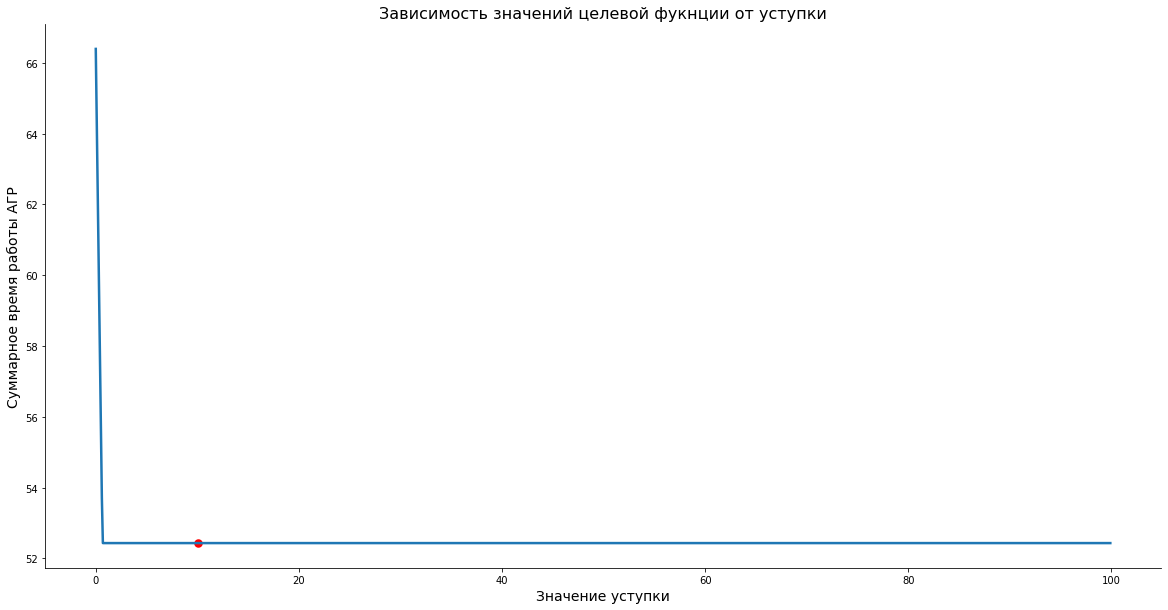

Наименьшее значение целевой функции достигается при уступке: 10.100000000000001


In [ ]:
# Мат модель в соответствии со схемой квази-лексикографической оптимизации
import numpy as np
import cvxpy

a = np.array([[0.07, 0.888, 0, 0, 0, 0],
              [0.42, 0, 0, 0, 0,0.539],
              [0, 0, 0, 0.154, 0, 0.807],
              [0.352, 0, 0.470, 0, 0.158, 0],
              [0, 0, 0.973, 0, 0, 0],
              [0.145, 0, 0, 0, 0.815, 0],
              [0, 0.687, 0, 0, 0, 0.277],
              [0.145, 0, 0, 0, 0, 0.833],
              [0, 0, 0, 0.318, 0.652, 0],
              [0, 0, 0, 0, 0.978, 0],
              [0, 0, 0, 0.795, 0.163, 0]])
b = np.array([[100, 100, 100, 100, 100, 100]])
P = np.array([[5, 9, 10, 10, 11,10, 14, 11, 14, 12, 15]]) #производительность работ
e = np.array([[0.042, 0.041, 0.039, 0.02, 0.027, 0.04, 0.036, 0.022, 0.03, 0.022, 0.042]]) # отходы при производстве продукции
l = [] #список для сбора значений целевой функции при различных значениях уступки
#Подбор величины уступки. Подбор простым перебором
for i in np.arange (0,100,0.1):
  x = cvxpy.Variable(shape=(1,a .shape[0]), integer = False)
  total =  cvxpy.sum([x[0,i]/P[0,i] for i in range(0,6)])+cvxpy.sum([x[0,i]/P[0,i] for i in range(6,11)])#целевая функция
  C0 = x>=0
  C1 = x*a>=b
  C2 = cvxpy.sum(x)<=(x_new+i)
  problem = cvxpy.Problem(cvxpy.Minimize(total), constraints=[C0,C1,C2])
  if problem.solve()== np.inf:
    print('Нет решения')
  else:
    l.append(problem.solve())
yield_ = np.arange (0,20,0.1)[np.argmin(l)] # Уступка по ресурсу
#Визуализация результатов подбора уступки
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(np.arange (0,100,0.1),l,linewidth=2.5)
plt.scatter(np.arange (0,100,0.1)[np.argmin(l)],np.min(l),c='r',linewidth=2.5)
plt.title('Зависимость значений целевой фукнции от уступки',fontsize=16)
plt.xlabel('Значение уступки',fontsize=14)
plt.ylabel('Суммарное время работы АГР',fontsize=14)
# Удаляем правую и верхнюю рамку
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()
print('Наименьшее значение целевой функции достигается при уступке:', yield_)

#### **Шаг 2.2 применение схемы квази-лексикографической оптимизации лучшее значение уступки**

In [ ]:
# Мат модель в соответствии со схемой квази-лексикографической оптимизации для наилучшего значения уступки
import numpy as np
import cvxpy

a = np.array([[0.07, 0.888, 0, 0, 0, 0],
              [0.42, 0, 0, 0, 0,0.539],
              [0, 0, 0, 0.154, 0, 0.807],
              [0.352, 0, 0.470, 0, 0.158, 0],
              [0, 0, 0.973, 0, 0, 0],
              [0.145, 0, 0, 0, 0.815, 0],
              [0, 0.687, 0, 0, 0, 0.277],
              [0.145, 0, 0, 0, 0, 0.833],
              [0, 0, 0, 0.318, 0.652, 0],
              [0, 0, 0, 0, 0.978, 0],
              [0, 0, 0, 0.795, 0.163, 0]])
b = np.array([[100, 100, 100, 100, 100, 100]])
P = np.array([[5, 9, 10, 10, 11,10, 14, 11, 14, 12, 15]]) #производительность работ
e = np.array([[0.042, 0.041, 0.039, 0.02, 0.027, 0.04, 0.036, 0.022, 0.03, 0.022, 0.042]]) # отходы при производстве продукции

x = cvxpy.Variable(shape=(1,a .shape[0]), integer = False)
total =  cvxpy.sum([x[0,i]/P[0,i] for i in range(0,6)])+cvxpy.sum([x[0,i]/P[0,i] for i in range(6,11)]) #целевая функция
C0 = x>=0
C1 = x*a>=b
C2 = cvxpy.sum(x)<=(x_new+yield_)

problem = cvxpy.Problem(cvxpy.Minimize(total), constraints=[C0,C1,C2])
if problem.solve()== np.inf:
    print('Нет решения')
else:
    print('Уступка:',yield_,'\nЗначение целевой функции:',problem.solve(),
          '\nРеcурса по каждой технологии переработать:',np.round(x.value,4),
          '\nСуммарное количество реcурса к переработаке:',np.round(np.sum(x.value),4),
          '\nТ1:',round(sum([x.value[0,i]/P[0,i] for i in range(0,6)]),2),'\nT2:',round(sum([x.value[0,i]/P[0,i] for i in range(6,11)]),2),
          '\nT1+T2:',round(sum([x.value[0,i]/P[0,i] for i in range(0,6)])+sum([x.value[0,i]/P[0,i] for i in range(6,11)]),2),
          '\nСуммарные отходы {} тонн'.format(round(np.sum(x.value*e),4)))
print('План, расчетный:',np.round(x.value@a,4))

Уступка: 10.100000000000001 
Значение целевой функции: 52.43176807256976 
Реcурса по каждой технологии переработать: [[  0.      45.1227   0.     212.766    0.       0.     145.5604  42.4474
   78.1865   0.      94.5116]] 
Суммарное количество реcурса к переработаке: 618.5944 
Т1: 26.29 
T2: 26.14 
T1+T2: 52.43 
Суммарные отходы 18.5944 тонн
План, расчетный: [[100. 100. 100. 100. 100. 100.]]


# **10.	Анализ полученных результатов**

**Шаг 1 расчет возможности выполнения плана без ограничения по фонду рабочего времени агрегатов**

На первом шаге получены следующие значения для количестваво тонн ресурса к переработке:$$X=[[111.2261, 0., 0., 212.766, 0., 0, 1.7921, 119.4521, 37.6706, 24.3095, 110.7179]]$$

Для реализации плана потребуется $T1=43.52$ часа и $T2=23.09$ часа для каждого агрегата, что сильно больше исходно заданного фонда рабочего времени работы агрегатов.\
Отходы при таком производстве составят $17.93$ тонн. 

Также видно, что в данное решение попали преимущественно, технологии с низким значением отходов, однако они требуют больших временных затрат.

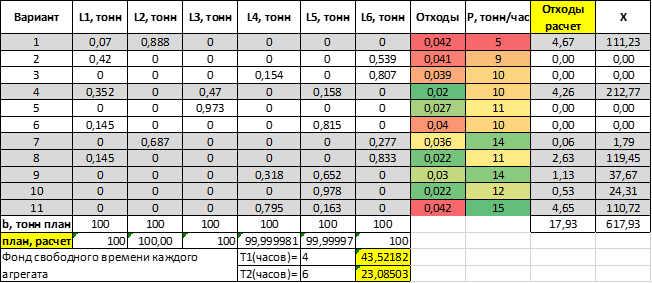

[Таблица 1](https://drive.google.com/file/d/1oDaFnNfVY-fKbQ4FdJhTragXJpLjWbuw/view?usp=sharing) – расчетные значения плана, отходов и времени работы агрегатов


Как и ожидалось при оценке времени работы агрегатов без ограничения по фонду рабочего времени получены одинаковые результаты для целевых функций суммарного ресурса и отходов: 617.93 тонн и 17.93 тонн соответственно. Од-нако для целевой функции отходов получаем отличное на 10-е доли распределе-ние ресурсов для 9,10,11 технологий. Далее используется, как целевая функция суммарное количество ресурса.

**Шаг 2 применение схемы квази-лексикографической оптимизации**

 При подборе параметра уступки наилучшим значением из услувия минимального значения целевой функции оказалось 10.1. Также при при достижении уступкой значения 0.8, значения целевой функции, времени работы агрегатов и отходов меняется в пределах десятитысячных долей.

 После этого шага вместо технологии 1 (менее производительной) предлагается использовать технологию 2.
Общее количество ресурса к переработке: 618.59 тонн, что на 0,66 тонн больше значения, полученного при расчете без ограничения по фонду рабочего времени. Также возрастает значение суммарных отходов на 0,66 тонн. При этом план выполняется.

Для реализации плана потребуется T1=26.29 часов и T2=26.15 часов для каждого агрегата, что в сумме на 14.18 часов меньше, чем результат сверхурочной работы, полученный при расчете без ограничения по фонду рабочего времени, но все равно в 5 раз больше исходных условий.

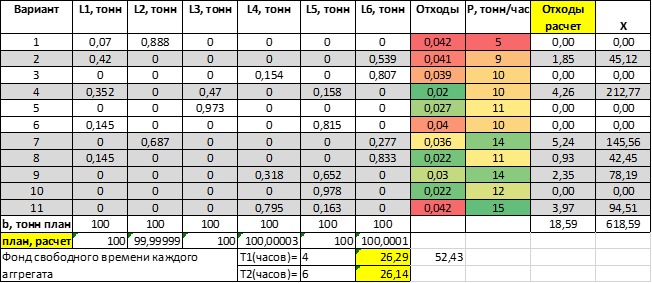

[Таблица 2](https://drive.google.com/file/d/1oDaFnNfVY-fKbQ4FdJhTragXJpLjWbuw/view?usp=sharing) – расчетные значения плана, отходов и времени работы агрегатов после квази-лексикографической оптимизации

Исходя из полученных результатов для продолжения анализа необходимо:
-	увеличить фонд рабочего времени агрегатов;
-	увеличить количество агрегатов;
- ипользовать для выпуска продукта более высокопроизводительные агрегаты
-	уменьшит план;
-	ввести дополнительные данные о стоимости утилизации ресурса, се-бестоимости ресурса, стоимость часа работы АГР.
